# LSTM Action Detection

In [ ]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme 
set_nb_theme('monokai')

In [1]:
import cv2 
import numpy as np
import os 
from matplotlib import pyplot as plt 
import time 
import mediapipe as mp

# Keypoints using mp Holistic model

In [2]:
mp_holistic=mp.solutions.holistic 
mp_drawing=mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model): 
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False 
    results=model.process(image) 
    image.flags.writeable=True 
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR) 
    return image,results

In [4]:
def draw_landmarks(image,results):  
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1), 
                              mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))  #Draw face connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=4, circle_radius=4), 
                                  mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))  
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), 
                                  mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))  
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4), 
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)) 
    

In [5]:
cap=cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():  
        
        ret,frame=cap.read()  
        #Make Detections 
        image,results=mediapipe_detection(frame,holistic)  
        #Draw Landmarks 
        draw_landmarks(image,results)
        #image=cv2.flip(image,1)
        print(results)
        cv2.imshow("OPEN CV FEED",image) 
        if cv2.waitKey(10) & 0xFF== ord('e'): 
            break 
cap.release() 
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
len(results.face_landmarks.landmark)*3#face landmarks=468

In [6]:
draw_landmarks(frame,results) 

#the draw_landmarks function doesnt return the image but rather applies the landmark visualiztions to the current image in place

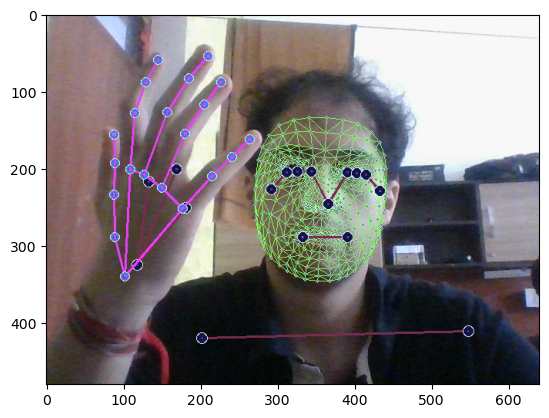

In [7]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extract Keypoint Values into a format

In [ ]:
results

In [ ]:
results.pose_landmarks

In [ ]:
for i in results.pose_landmarks.landmark: 
    test=np.array([i.x,i.y,i.z,i.visibility])

In [ ]:
test#array for 1 landmark

In [ ]:
rh

In [ ]:
lh

In [ ]:
len(results.pose_landmarks.landmark)*3#pose landmarks=33

In [ ]:
len(results.right_hand_landmarks.landmark)*3#RH landmarks=21, LH landmarks=21

In [ ]:
pose.shape

In [ ]:
lh

In [ ]:
np.zeros(21*3).shape#if no landmarks for other hand create blank array

In [8]:
def extract_keypoints(results):  
    pose=np.array([[i.x,i.y,i.z,i.visibility] for i in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132) 
    lh=np.array([[i.x,i.y,i.z] for i in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[i.x,i.y,i.z] for i in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)  
    face=np.array([[i.x,i.y,i.z] for i in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    return np.concatenate([pose,face,lh,rh])

In [9]:
extract_keypoints(results).shape# 468*3*33*4*21*3*21

(1662,)

# Setup folders

In [10]:
#dp=os.path.join("ISL_data")
actions=np.array(["Hello","Indian","Sign","Language"])  
#30 videos worth of data
no_sequences=30# 30 diff frames, 30 diff keypoints of data 30*1632 a seq of data instead of a single frame is used 
# videos are 30 frames in length
sequence_length=30 
#no_sequences=200#200*1632

In [ ]:
for i in actions: 
    for j in range(no_sequences): 
        try: 
            os.makedirs(os.join(dp,action,str(sequence))) 
        except: 
            pass

In [ ]:
 os.path.abspath(os.getcwd())

In [11]:


# Define the path to the folder on the C drive where your data is stored
dp = "C:\\Users\\shive\\Untitled Folder\\ISL_data"# Replace with the actual path to your folder 


# Check if the folder exists
if os.path.exists(dp):
    # List the contents of the folder
    folder_contents = os.listdir(dp)
    
    # You can now work with the contents of the folder
    for item in folder_contents:
        item_path = os.path.join(dp, item)
        
        if os.path.isfile(item_path):
            print(f"Found file: {item}")
        elif os.path.isdir(item_path):
            print(f"Found subfolder: {item}")
else:
    print(f"Folder not found: {dp}")



Found subfolder: Hello
Found subfolder: Indian
Found subfolder: Language
Found subfolder: Sign


In [ ]:
cap=cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():  
        for action in actions: 
            for sequence in range(no_sequences): 
                for frame_num in range(sequence_length):  
                    
                    
        
                    ret,frame=cap.read()  
                    #Make Detections 
                    image,results=mediapipe_detection(frame,holistic)  
                    #Draw Landmarks 
                    draw_landmarks(image,results) 
                    # Aplly WAIT logic 
                    if frame_num==0: 
                        cv2.putText(image,"STARTING COLLECTION",(120,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4,cv2.LINE_AA) 
                        cv2.putText(image,f"Collecting frames for {action} Video Number {sequence}",(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA) 
                        cv2.waitKey(2000)# wait 2 seconds for each video 
                    else:  
                        cv2.putText(image,f"Collecting frames for {action} Video Number {sequence}",(15,12),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA) 

                    keypoints=extract_keypoints(results)  
                    npy_path=os.path.join(dp,action,str(sequence),str(frame_num)) 
                    np.save(npy_path,keypoints)

                    #image=cv2.flip(image,1)
                    print(results)
                    cv2.imshow("OPEN CV FEED",image) 
                    if cv2.waitKey(10) & 0xFF== ord('e'): 
                        break 
        cap.release() 
        cv2.destroyAllWindows()

In [ ]:
cap.release() 
cv2.destroyAllWindows()

### Collection Breaks- having breaks btw each sequence collection allows u to RESET and reposition 
### yourself to collect the action from start to finish

In [ ]:
result_test=extract_keypoints(results) 


In [ ]:
result_test

In [ ]:
np.save('0',result_test)#filename is 0.npy

In [ ]:
#saving each frame as numpy array , we gonna have 30 np arrays in folders 0,1,2.... in each of hello,iloveyou and thankyou

In [ ]:
np.load("0.npy")

# Preprocess Data and Create Labels and Features 

In [12]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical 
# partition data to train and test 
#one hot encoding 
#create set of label map/dict to represent each 

In [13]:
label_map={label:num for num,label in enumerate(actions)}

In [14]:
label_map

{'Hello': 0, 'Indian': 1, 'Sign': 2, 'Language': 3}

In [15]:
#one big array of data- 90 arrays 
sequences,labels=[],[] # sequences represnt X_data and label represents Y_data
for action in actions: 
    for sequence in range(no_sequences): #30 sequences or 30 videos
        window=[] #blank array of all frames in a seq
        for frame_num in range(sequence_length): #30 frames in length
            res=np.load(os.path.join(dp,action,str(sequence), f"{frame_num }.npy ",)) 
            window.append(res) 
        sequences.append(window)  #video1 done now append to sequences-120 diff videos
        labels.append(label_map[action])
        

In [16]:
np.array(sequences).shape

(120, 30, 1662)

In [17]:
res.shape

(1662,)

In [18]:
np.array(labels)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [19]:
x=np.array(sequences)

In [20]:
x

array([[[ 0.57913703,  0.41839254, -1.66987872, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.57865012,  0.42653096, -1.63112068, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.57835436,  0.43005034, -1.61814952, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.56170279,  0.42100537, -1.37727773, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56129503,  0.42093042, -1.24209416, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56107414,  0.42089114, -1.2358973 , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.56090015,  0.42082778, -1.23398626, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56059206,  0.41857263, -1.25374186, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.5605889 ,  0.4184033 , -1.24304903, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.55324924,  0.41736251, -0.89239579, ...,  

In [21]:
y=to_categorical(labels).astype(int)

In [22]:
y.size

480

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)

In [24]:
x_train.shape

(114, 30, 1662)

In [25]:
x_test.shape

(6, 30, 1662)

In [26]:
y_train.shape

(114, 4)

In [27]:
y_test.shape

(6, 4)

# Building and Training LSTM Neural Network

In [ ]:
#build sequental nn-tenso crash course 
#lstm layer-temp component pass thru dense which is fully connected layer 
#perform logging inside ten board 
#set up log diretory and tensorboard callbac

In [28]:
from tensorflow.keras.models import Sequential  #sequential crash course
from tensorflow.keras.layers import LSTM,Dense 
from tensorflow.keras.callbacks import TensorBoard

In [29]:
log_dir=os.path.join("Logs")
tb_callback=TensorBoard(log_dir=log_dir)

In [30]:


model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu')) 
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))





In [31]:
actions.shape[0]

4

In [ ]:
res=[.7,.2,.1]  
np.argmax(res)


In [ ]:
actions[np.argmax(res)]# EXAMPLE-our model is saying action predicted is hello 
# combine 30 frames and 1662 keypoints , preprocess and extract our actions

### 30 sequences diff per class=120 , need less data , faster to train, NN is simpler and has faster detections

In [32]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [ ]:
#multiclass classf model, bnary class class=mean squared error

In [33]:
model.fit(x_train,y_train,epochs=120,callbacks=[tb_callback])

Epoch 1/120
4/4 [==============================] - 17s 174ms/step - loss: 14.1736 - categorical_accuracy: 0.2281
Epoch 2/120
4/4 [==============================] - 1s 138ms/step - loss: 15.7733 - categorical_accuracy: 0.2281
Epoch 3/120
4/4 [==============================] - 1s 137ms/step - loss: 18.7346 - categorical_accuracy: 0.3421
Epoch 4/120
4/4 [==============================] - 0s 120ms/step - loss: 34.1236 - categorical_accuracy: 0.2632
Epoch 5/120
4/4 [==============================] - 1s 126ms/step - loss: 46.9448 - categorical_accuracy: 0.2544
Epoch 6/120
4/4 [==============================] - 1s 133ms/step - loss: 25.6129 - categorical_accuracy: 0.2281
Epoch 7/120
4/4 [==============================] - 1s 134ms/step - loss: 50.9744 - categorical_accuracy: 0.3158
Epoch 8/120
4/4 [==============================] - 1s 142ms/step - loss: 113.0460 - categorical_accuracy: 0.2193
Epoch 9/120
4/4 [==============================] - 1s 122ms/step - loss: 33.9227 - categorical_accurac

4/4 [==============================] - 0s 117ms/step - loss: 6.3787 - categorical_accuracy: 0.2632
Epoch 74/120
4/4 [==============================] - 0s 119ms/step - loss: 7.6579 - categorical_accuracy: 0.2632
Epoch 75/120
4/4 [==============================] - 1s 129ms/step - loss: 5.3421 - categorical_accuracy: 0.2105
Epoch 76/120
4/4 [==============================] - 0s 128ms/step - loss: 4.5608 - categorical_accuracy: 0.3158
Epoch 77/120
4/4 [==============================] - 0s 120ms/step - loss: 3.4816 - categorical_accuracy: 0.3158
Epoch 78/120
4/4 [==============================] - 1s 125ms/step - loss: 3.7064 - categorical_accuracy: 0.3070
Epoch 79/120
4/4 [==============================] - 1s 130ms/step - loss: 6.0705 - categorical_accuracy: 0.2632
Epoch 80/120
4/4 [==============================] - 1s 143ms/step - loss: 5.2730 - categorical_accuracy: 0.2807
Epoch 81/120
4/4 [==============================] - 0s 118ms/step - loss: 4.1546 - categorical_accuracy: 0.3684
Epoch

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 30, 64)            49408     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 625572 (2.39 MB)
Trainable params: 625572 

# Make Predictions

In [35]:
res=model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [36]:
res#6x4 matrix

array([[1.02628439e-08, 3.50034126e-04, 9.99185383e-01, 4.64569719e-04],
       [3.07353344e-11, 1.57794129e-05, 9.99104202e-01, 8.80021602e-04],
       [7.49445922e-11, 1.18627895e-05, 9.98290479e-01, 1.69759628e-03],
       [2.10817905e-10, 1.66793398e-05, 9.97808039e-01, 2.17524846e-03],
       [1.32769262e-09, 9.74105424e-05, 9.99385953e-01, 5.16663305e-04],
       [4.66119945e-06, 5.80851594e-03, 9.93922412e-01, 2.64436967e-04]],
      dtype=float32)

In [37]:
res.size

24

In [38]:
actions[y_test[0]]

array(['Indian', 'Hello', 'Hello', 'Hello'], dtype='<U8')

In [39]:
res[0]

array([1.0262844e-08, 3.5003413e-04, 9.9918538e-01, 4.6456972e-04],
      dtype=float32)

In [40]:
actions[np.argmax(res[0])]

'Sign'

In [41]:
actions[np.argmax(y_test[0])]

'Hello'

model.save('action.h5')

In [ ]:
# Save your Keras model in the native Keras format
model.save('my_model.keras')




In [ ]:
#del model 
#model.load_weights(actions.h5')

# Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score




In [ ]:
yhat=model.predict(x_test)

In [ ]:
ytrue=np.argmax(y_test,axis=1).tolist() 
yhat=np.argmax(yhat,axis=1).tolist()

In [ ]:
yhat

In [ ]:
ytrue

In [ ]:
multilabel_confusion_matrix(ytrue,yhat)

In [ ]:
accuracy_score(ytrue,yhat)

# Test in RealTime

In [ ]:
colors=[(245,117,16),(117,245,16),(16,117,245)] 
def prob_vis(res,actions,input_frame,colors): #res coming from model.predict in main cv code
    output_frame=input_frame.copy()
    for num,prob in enumerate(res): 
        cv2.rectangle(output_frame,(0,60+num*40),{int(prob*100),90+num*40),colors[num],-1} #problem in this line??
        cv2.putText(output_frame,actions[num],(0,85+num*40),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA) 
    return output_frame

In [ ]:
plt.imshow(image)

## PROBABILITY OF COLORS LOGIC 

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245),(184, 134, 11)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [ ]:
plt.figure(figsize=(18,18)) 
plt.imshow(prob_vis(res,actions,frame,colors))

In [ ]:
plt.imshow(frame)

In [ ]:
plt.figure(figsize=(18,18)) 
plt.imshow(prob_vis(res,actions,image,colors))

In [ ]:
  #VIZUALIZATION LOGIC 
       """ if res[np.argmax(res)]>threshold: 
            if len(sentence)>0: #append the next action if its diff from last
                if actions[np.argmax(res)]!=sentence[-1]: 
                    sentence.append(actions[np.argmax(res)]) 
            else: 
                sentence.append(actions[np.argmax(res)]) 
        if len(sentence)>5: 
            sentence=sentence[-5:]  """ 
 """ #VISUALIZATION LOGIC BY CHATGPT         
        if len(res) == len(actions) and res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)       
        #VIZUALIZE PROBABILITIES 
        image=prob_vis(res,actions,image,colors)"""

In [ ]:
 #new detection variables: 
sequence=[] #collect 30 frames to predict
sentence=[]  #concat sequences
#threshold=0.7

cap=cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():  
        
        ret,frame=cap.read()  
        #Make Detections 
        image,results=mediapipe_detection(frame,holistic) 
        print(results)
        #Draw Landmarks 
        draw_landmarks(image,results)
        #image=cv2.flip(image,1) 
        
        # PREDICTION LOGIC 
        keypoints=extract_keypoints(results) 
        #sequence.append(keypoints) 
        sequence.insert(0,keypoints)
        sequence=sequence[:30] 
        if len(sequence)==30: 
            res=model.predict(np.expand_dims(sequence,axis=0))[0] 
            print(actions[np.argmax(res)]) 
        cv2.imshow("OPEN CV FEED",image) 
        if cv2.waitKey(10) & 0xFF== ord('e'): 
            break 
cap.release() 
cv2.destroyAllWindows()

# main code with viz logic 

In [ ]:
 #new detection variables: 
sequence=[] #collect 30 frames to predict
sentence=[]  #concat sequences 
predictions=[]
threshold=0.4 


cap=cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():  
        
        ret,frame=cap.read()  
        #Make Detections 
        image,results=mediapipe_detection(frame,holistic) 
        print(results)
        #Draw Landmarks 
        draw_landmarks(image,results)
        #image=cv2.flip(image,1) 
        
        # PREDICTION LOGIC 
        keypoints=extract_keypoints(results) 
        sequence.append(keypoints) #new
        #sequence.insert(0,keypoints) is wrong
        sequence=sequence[-30:] #new 
        if len(sequence)==30: 
            res=model.predict(np.expand_dims(sequence,axis=0))[0] 
            print(actions[np.argmax(res)])  
            predictions.append(np.argmax(res))#new
        # VIZUALIZATION LOGIC!!!! 
            if np.unique(predictions[-10:])[0]==np.argmax(res):#new : minimizes fault detections 
                if res[np.argmax(res)]>threshold:  
                    if len(sentence)>0: #append the next action if its diff from last 
                        
                        if actions[np.argmax(res)]!=sentence[-1]: # if current action != last sentence in string
                            sentence.append(actions[np.argmax(res)]) 
                    else: 
                        sentence.append(actions[np.argmax(res)]) 
            if len(sentence)>5: 
                sentence=sentence[-5:] 
        #VIZ PROBABILITIES 
        image=prob_viz(res,action,image,colors)
        cv2.rectangle(image,(0,0),(640,40),(128,128,128),-1)#greycolor
        cv2.putText(image,' '.join(sentence),(4,30),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),3,cv2.LINE_AA)#lemon color   
        cv2.imshow("OPEN CV FEED",image) 
        if cv2.waitKey(10) & 0xFF== ord('e'): 
            break 
cap.release() 
cv2.destroyAllWindows()

In [ ]:
sequence = []  # Collect 30 frames to predict
sentence = []  # Concat sequences
predictions = []
threshold = 0.4
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (184, 134, 11)]

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw Landmarks
        draw_landmarks(image, results)
        # image = cv2.flip(image, 1)

        # PREDICTION LOGIC
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)  # new
        # sequence.insert(0,keypoints) is wrong
        sequence = sequence[-30:]  # new
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))  # new
        # VIZUALIZATION LOGIC!!!!
            if np.unique(predictions[-10:])[0] == np.argmax(res):  # new: minimizes fault detections
                if res[np.argmax(res)] > threshold:
                    # Append the next action if it's different from the last
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:  # if current action != last sentence in string
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # VIZ PROBABILITIES
        image = prob_viz(res, actions, image, colors)

        # Create sidebars with specific words
        sidebar_text = "Hello Indian Sign Language"
        sidebar_height = 40
        sidebar_color = (128, 128, 128)  # Grey color
        cv2.rectangle(image, (0, 0), (640, sidebar_height), sidebar_color, -1)
        cv2.putText(image, sidebar_text, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)  # Lemon color

        cv2.imshow("OPEN CV FEED", image)
        if cv2.waitKey(10) & 0xFF == ord('e'):
            break

cap.release()
cv2.destroyAllWindows()


In [ ]:
predictions#grabs last 10 predictions , last 10 frames have exact same predictions-> gives more stability 

In [ ]:
sequence.append('abc') 
sequence

In [ ]:
sequence[:30]#gives first 30 frames not last 30 frames so abc isnt there

In [ ]:
sequence[-30:]#grabs last frame too

In [ ]:
x_test.shape

In [ ]:
model.predict(x_test)

In [ ]:
res# here 9.9999 which is 0.9999962 indicates index 1 which is indian has the the max argument selected

In [ ]:
res[np.argmax(res)]

In [ ]:
print(res)

In [ ]:
model.predict(x_test)

In [ ]:
model.predict(np.expand_dims(x_test[5],axis=0))

In [ ]:
t=model.predict(np.expand_dims(x_test[5],axis=0))

In [ ]:
actions[np.argmax(t)]

In [ ]:
x_test[0].shape

In [ ]:
np.expand_dims(x_test[0],axis=0).shape

In [ ]:
cap.release() 
cv2.destroyAllWindows()

In [ ]:
def prob_viz(res, words, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, words[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


In [ ]:
 #new detection variables: 
sequence=[] #collect 30 frames to predict
sentence=[]  #concat sequences 
predictions=[]
threshold=0.4 


cap=cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():  
        
        ret,frame=cap.read()  
        #Make Detections 
        image,results=mediapipe_detection(frame,holistic) 
        print(results)
        #Draw Landmarks 
        draw_landmarks(image,results)
        #image=cv2.flip(image,1) 
        
        # PREDICTION LOGIC 
        keypoints=extract_keypoints(results) 
        sequence.append(keypoints) #new
        #sequence.insert(0,keypoints) is wrong
        sequence=sequence[-30:] #new 
        if len(sequence)==30: 
            res=model.predict(np.expand_dims(sequence,axis=0))[0] 
            print(actions[np.argmax(res)])  
            predictions.append(np.argmax(res))#new
        # VIZUALIZATION LOGIC!!!! 
            if np.unique(predictions[-10:])[0]==np.argmax(res):#new : minimizes fault detections 
        
                if res[np.argmax(res)]>threshold:  
                    
                    if len(sentence)>0: #append the next action if its diff from last 
                        
                        if actions[np.argmax(res)]!=sentence[-1]: # if current action != last sentence in string
                            sentence.append(actions[np.argmax(res)]) 
                    else: 
                        sentence.append(actions[np.argmax(res)]) 
            if len(sentence)>5: 
                sentence=sentence[-5:] 
        #VIZ PROBABILITIES 
        # Define the words you want to display
            words_to_display = ["Hello", "Indian", "Sign", "Language"]

            # Inside your main loop, call prob_viz with the words
            #image = prob_viz(res, words_to_display, image, colors)

            image=prob_vis(res,action,image,colors)
        cv2.rectangle(image,(0,0),(640,40),(128,128,128),-1)#greycolor
        cv2.putText(image,' '.join(sentence),(3,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,cv2.LINE_AA)#lemon color   
        cv2.imshow("OPEN CV FEED",image) 
        if cv2.waitKey(10) & 0xFF== ord('e'): 
            break 
cap.release() 
cv2.destroyAllWindows()

In [ ]:
# New detection variables
sequence = []  # Collect 30 frames to predict
sentence = []  # Concat sequences
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw Landmarks
        draw_landmarks(image, results)

        # PREDICTION LOGIC
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    # Append the next action if it's different from the last
                    if len(sentence) > 0:
                        if "hello" not in sentence and "indian" not in sentence and "sign" not in sentence and "language" not in sentence:
                            sentence.append("hello")
                            sentence.append("indian")
                            sentence.append("sign")
                            sentence.append("language")
                    else:
                        sentence.extend(["hello", "indian", "sign", "language"])

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # VIZ PROBABILITIES
        image = prob_vis(res, sentence, image, colors)

        # Create sidebars with specific words
        sidebar_text = "Hello Indian Sign Language"
        sidebar_height = 40
        sidebar_color = (128, 128, 128)  # Grey color
        cv2.rectangle(image, (0, 0), (640, sidebar_height), sidebar_color, -1)
        cv2.putText(image, sidebar_text, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)  # Lemon color

        cv2.imshow("OPEN CV FEED", image)
        if cv2.waitKey(10) & 0xFF == ord('e'):
            break

cap.release()
cv2.destroyAllWindows()


In [ ]:
def prob_viz(res, words, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, words[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame 
# New detection variables
sequence = []  # Collect 30 frames to predict
sentence = []  # Concat sequences
predictions = []
threshold = 0.4

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()
        # Make Detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        # Draw Landmarks
        draw_landmarks(image, results)

        # PREDICTION LOGIC
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    # Append the next action if it's different from the last
                    if len(sentence) > 0:
                        if "hello" not in sentence and "indian" not in sentence and "sign" not in sentence and "language" not in sentence:
                            sentence.append("hello")
                            sentence.append("indian")
                            sentence.append("sign")
                            sentence.append("language")
                    else:
                        sentence.extend(["hello", "indian", "sign", "language"])

            if len(sentence) > 5:
                sentence = sentence[-5:]

        # VIZ PROBABILITIES 
        words_to_display = ["Hello", "Indian", "Sign", "Language"]
        image = prob_vis(res, words_to_display, image, colors)

        # Create sidebars with specific words
        sidebar_text = "Hello Indian Sign Language"
        sidebar_height = 40
        sidebar_color = (128, 128, 128)  # Grey color
        cv2.rectangle(image, (0, 0), (640, sidebar_height), sidebar_color, -1)
        cv2.putText(image, sidebar_text, (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)  # Lemon color

        cv2.imshow("OPEN CV FEED", image)
        if cv2.waitKey(10) & 0xFF == ord('e'):
            break

cap.release()
cv2.destroyAllWindows()

